In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
columnss=['t_dat','article_id','customer_id']
enhanced_transactions_data_path="kaggle_data/enhanced_transactions.csv"
enhanced_transactions_are_go=pd.read_csv(enhanced_transactions_data_path,usecols = columnss)


In [3]:
enhanced_transactions_are_go.head(2)

,t_dat,customer_id,article_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001
1,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001


In [4]:

enhanced_transactions_are_go=enhanced_transactions_are_go.dropna(subset=['t_dat'])


In [5]:
enhanced_transactions_are_go=enhanced_transactions_are_go.reset_index()

In [6]:
enhanced_transactions_are_go.head()

,index,t_dat,customer_id,article_id
0,0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001
1,1,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001
2,2,2018-09-20,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001
3,3,2018-09-20,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001
4,4,2018-09-20,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001


In [7]:
# This adds the customer order number witht he transactions, breaking ties by the newly added index for consistency 
enhanced_transactions_are_go['customer_order_number'] = (enhanced_transactions_are_go.sort_values(['t_dat','index'])
                      .groupby(['customer_id']).cumcount(ascending=False)+1
                    )

# This adds the producgt order number witht he transactions, breaking ties by the newly added index for consistency 
enhanced_transactions_are_go['customer_product_order_number'] = (enhanced_transactions_are_go.sort_values(['t_dat','index'])
                      .groupby(['customer_id','article_id']).cumcount(ascending=False)+1
                    )

In [8]:
enhanced_transactions_are_go.head()

,index,t_dat,customer_id,article_id,customer_order_number,customer_product_order_number
0,0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,18,2
1,1,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,126,1
2,2,2018-09-20,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,340,1
3,3,2018-09-20,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,109,1
4,4,2018-09-20,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,2,1


In [13]:
enhanced_transactions_are_go['rebuy'] = np.where((enhanced_transactions_are_go['customer_product_order_number'] >1),True, False)

In [22]:
new_table_for_the_moment=enhanced_transactions_are_go.groupby(['customer_order_number','rebuy']).agg({'index':'count'}).reset_index()

In [23]:
new_table_for_the_moment['sum_rebuy']=new_table_for_the_moment.groupby(['customer_order_number'])['index'].transform('sum')

In [25]:
new_table_for_the_moment['percent_total']=new_table_for_the_moment['index']/new_table_for_the_moment['sum_rebuy']

In [31]:
plotting_table=new_table_for_the_moment[new_table_for_the_moment['rebuy']==True].head(200)

,customer_order_number,rebuy,index,sum_rebuy,percent_total
2,2,True,139408,1230767,0.113269
4,3,True,96625,1103326,0.087576
6,4,True,117633,1007640,0.116741
8,5,True,98593,925558,0.106523
10,6,True,106132,860923,0.123277


In [42]:
plotting_graph=new_table_for_the_moment[new_table_for_the_moment['rebuy']==True]
plotting_graph.head()

,customer_order_number,rebuy,index,sum_rebuy,percent_total
2,2,True,139408,1230767,0.113269
4,3,True,96625,1103326,0.087576
6,4,True,117633,1007640,0.116741
8,5,True,98593,925558,0.106523
10,6,True,106132,860923,0.123277


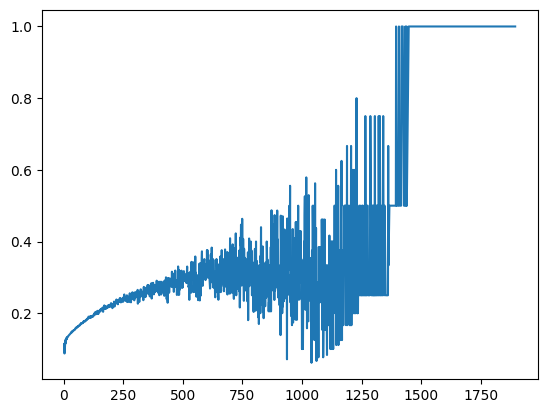

In [43]:
plt.plot(plotting_graph['customer_order_number'], plotting_graph['percent_total'])